# Brief example of Materials Project + PyMatGen
Using the API to access Materials Project data.

Information on [API](https://materialsproject.org/wiki/index.php/The_Materials_API) at the MP website.

In [1]:
from pymatgen import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter
from pymatgen.electronic_structure import plotter
MY_API_KEY = None  # replace with string of your API key

Note: There are three ways to do the following line, which requires the API key generated from MaterialsProject.

1. write the line as `MPRester("YOUR_API_KEY")` where you explicitly include your API key in the line--though it should not be shared.
2. create / edit the `$HOME/.pmgrc.yaml` file to include the line:
```
PMG_MAPI_KEY: <USER_API_KEY>
```
    where you put your actual API key in `<USER_API_KEY>`
3. execute `pmg config --add PMG_MAPI_KEY <USER_API_KEY>` at the command line, with the appropriate API key. This will create the `.pmgrc.yaml` file in the correct location.

In [2]:
with MPRester(MY_API_KEY) as m:
    entries = m.get_entries_in_chemsys(['Ca', 'C', 'O'])

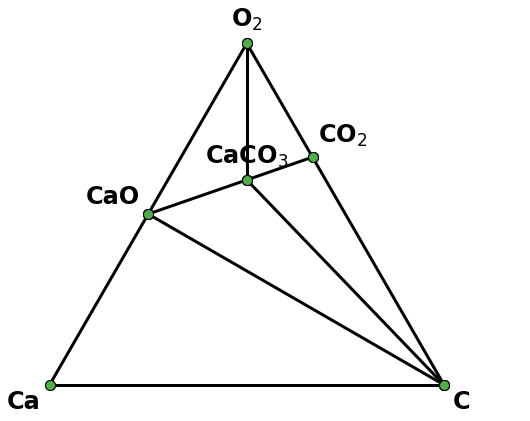

In [3]:
pd = PhaseDiagram(entries)
pltr = PDPlotter(pd)
pltr.show() 

Band structure example:

In [4]:
with MPRester(MY_API_KEY) as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-1234")

    # Dos for material id
    dos = m.get_dos_by_material_id("mp-1234")

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-1234")

In [5]:
print(structure)

Full Formula (Lu2 Al4)
Reduced Formula: LuAl2
abc   :   5.488739   5.488739   5.488739
angles:  60.000000  60.000000  60.000000
Sites (6)
  #  SP        a      b      c    magmom
---  ----  -----  -----  -----  --------
  0  Al    0.5    0.5    0.5           0
  1  Al    0.5    0.5    0             0
  2  Al    0      0.5    0.5           0
  3  Al    0.5    0      0.5           0
  4  Lu    0.875  0.875  0.875         0
  5  Lu    0.125  0.125  0.125         0


In [6]:
structure

Structure Summary
Lattice
    abc : 5.488739045730133 5.488739048031658 5.48873905
 angles : 60.0000000484055 60.00000003453459 60.000000071689925
 volume : 116.92375473740876
      A : 4.75338745 0.0 2.74436952
      B : 1.58446248 4.48153667 2.74436952
      C : 0.0 0.0 5.48873905
PeriodicSite: Al (3.1689, 2.2408, 5.4887) [0.5000, 0.5000, 0.5000]
PeriodicSite: Al (3.1689, 2.2408, 2.7444) [0.5000, 0.5000, 0.0000]
PeriodicSite: Al (0.7922, 2.2408, 4.1166) [0.0000, 0.5000, 0.5000]
PeriodicSite: Al (2.3767, 0.0000, 4.1166) [0.5000, 0.0000, 0.5000]
PeriodicSite: Lu (5.5456, 3.9213, 9.6053) [0.8750, 0.8750, 0.8750]
PeriodicSite: Lu (0.7922, 0.5602, 1.3722) [0.1250, 0.1250, 0.1250]

In [7]:
print(dos)

Complete DOS for Full Formula (Lu2 Al4)
Reduced Formula: LuAl2
abc   :   5.488740   5.488740   5.488740
angles:  60.000000  60.000000  60.000000
Sites (6)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Lu    0.125  0.125  0.125
  1  Lu    0.875  0.875  0.875
  2  Al    0      0.5    0.5
  3  Al    0.5    0.5    0.5
  4  Al    0.5    0      0.5
  5  Al    0.5    0.5    0


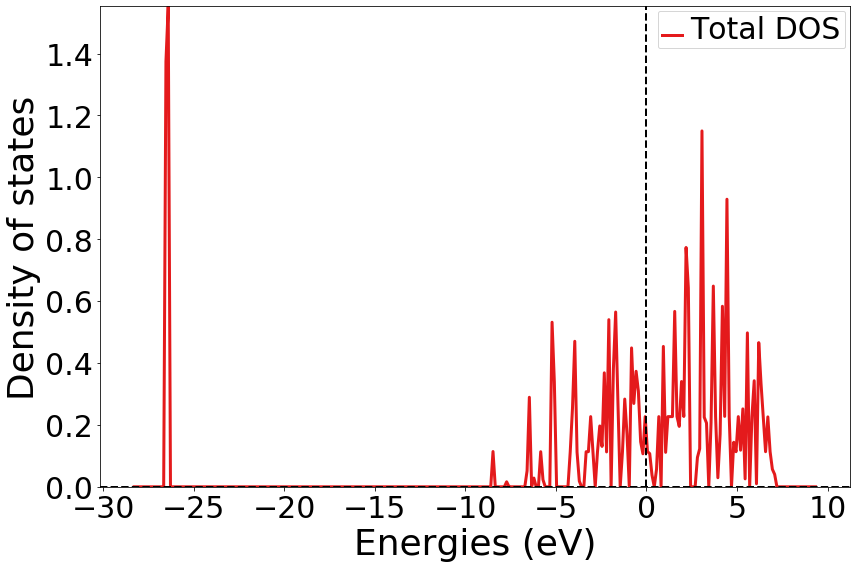

In [8]:
pltr = plotter.DosPlotter()
pltr.add_dos("Total DOS", dos)
pltr.show()

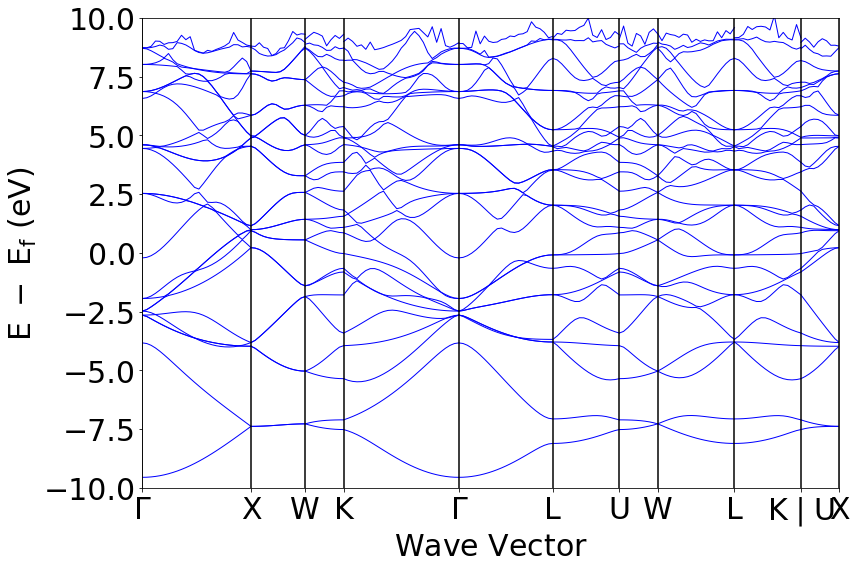

In [9]:
pltr = plotter.BSPlotter(bandstructure)
pltr.show()